https://www.metoffice.gov.uk/hadobs/crutem4/data/download.html
https://www.metoffice.gov.uk/hadobs/crutem4/data/gridded_fields/CRUTEM.4.6.0.0.anomalies.nc.gz

Why use temperature anomalies (departure from average) and not absolute temperature measurements?
Absolute estimates of global average surface temperature are difficult to compile for several reasons. Some regions have few temperature measurement stations (e.g., the Sahara Desert) and interpolation must be made over large, data-sparse regions. In mountainous areas, most observations come from the inhabited valleys, so the effect of elevation on a region's average temperature must be considered as well. For example, a summer month over an area may be cooler than average, both at a mountain top and in a nearby valley, but the absolute temperatures will be quite different at the two locations. The use of anomalies in this case will show that temperatures for both locations were below average.

Using reference values computed on smaller [more local] scales over the same time period establishes a baseline from which anomalies are calculated. This effectively normalizes the data so they can be compared and combined to more accurately represent temperature patterns with respect to what is normal for different places within a region.

For these reasons, large-area summaries incorporate anomalies, not the temperature itself. Anomalies more accurately describe climate variability over larger areas than absolute temperatures do, and they give a frame of reference that allows more meaningful comparisons between locations and more accurate calculations of temperature trends.

In [2]:
fname = '/Users/pelson/Downloads/CRUTEM.4.6.0.0.anomalies.nc'

In [3]:
import iris
iris.__version__

'2.0.0'

In [4]:
temp_ts = iris.load_cube(fname, 'temperature_anomaly')

/Users/pelson/miniconda/envs/cartopy_all/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/Users/pelson/miniconda/envs/cartopy_all/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/Users/pelson/miniconda/envs/cartopy_all/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(

In [5]:
print(temp_ts)

temperature_anomaly / (K)           (time: 2016; latitude: 36; longitude: 72)
     Dimension coordinates:
          time                           x               -              -
          latitude                       -               x              -
          longitude                      -               -              x
     Attributes:
          Conventions: CF-1.0
          comment: 
          history: 
          institution: Climatic Research Unit, University of East Anglia/Met Office Hadley Ce...
          reference: Jones, P. D., D. H. Lister, T. J. Osborn, C. Harpham, M. Salmon, and C....
          reference_period: [1961 1990]
          source: 
          title: CRUTEM4 temperature anomalies
          version: CRUTEM.4.6.0.0


In [6]:
print(temp_ts.coord('time'))

DimCoord([1850-01-16 12:00:00, 1850-02-15 00:00:00, 1850-03-16 12:00:00, ...,
       2017-10-16 12:00:00, 2017-11-16 00:00:00, 2017-12-16 12:00:00], standard_name='time', calendar='gregorian', long_name='time', var_name='time')


In [7]:
%matplotlib notebook

In [8]:
temp_1878 = temp_ts.extract(iris.Constraint(time=lambda c: c.point.year == 1878 and c.point.month == 6))

In [9]:
import iris.coord_categorisation as icat
icat.add_categorised_coord(temp_ts, 'decade', 'time', lambda coord, point: coord.units.num2date(point).year//10*10)

In [10]:
icat.add_month_number(temp_ts, 'time')

In [11]:
print(temp_ts)

temperature_anomaly / (K)           (time: 2016; latitude: 36; longitude: 72)
     Dimension coordinates:
          time                           x               -              -
          latitude                       -               x              -
          longitude                      -               -              x
     Auxiliary coordinates:
          decade                         x               -              -
          month_number                   x               -              -
     Attributes:
          Conventions: CF-1.0
          comment: 
          history: 
          institution: Climatic Research Unit, University of East Anglia/Met Office Hadley Ce...
          reference: Jones, P. D., D. H. Lister, T. J. Osborn, C. Harpham, M. Salmon, and C....
          reference_period: [1961 1990]
          source: 
          title: CRUTEM4 temperature anomalies
          version: CRUTEM.4.6.0.0


In [12]:
r = temp_ts.aggregated_by(['decade', 'month_number'], iris.analysis.MEAN)
print(r)

temperature_anomaly / (K)           (time: 204; latitude: 36; longitude: 72)
     Dimension coordinates:
          time                           x              -              -
          latitude                       -              x              -
          longitude                      -              -              x
     Auxiliary coordinates:
          decade                         x              -              -
          month_number                   x              -              -
     Attributes:
          Conventions: CF-1.0
          comment: 
          history: 
          institution: Climatic Research Unit, University of East Anglia/Met Office Hadley Ce...
          reference: Jones, P. D., D. H. Lister, T. J. Osborn, C. Harpham, M. Salmon, and C....
          reference_period: [1961 1990]
          source: 
          title: CRUTEM4 temperature anomalies
          version: CRUTEM.4.6.0.0
     Cell methods:
          mean: decade, month_number


In [13]:
temp_1880 = r.extract(iris.Constraint(decade=1880, month_number=12))

/Users/pelson/miniconda/envs/cartopy_all/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/pelson/miniconda/envs/cartopy_all/lib/python3.6/site-packages/iris/coords.py:975: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/Users/pelson/miniconda/envs/cartopy_all/lib/python3.6/site-packages/iris/coords.py:975: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


<IPython.core.display.Javascript object>


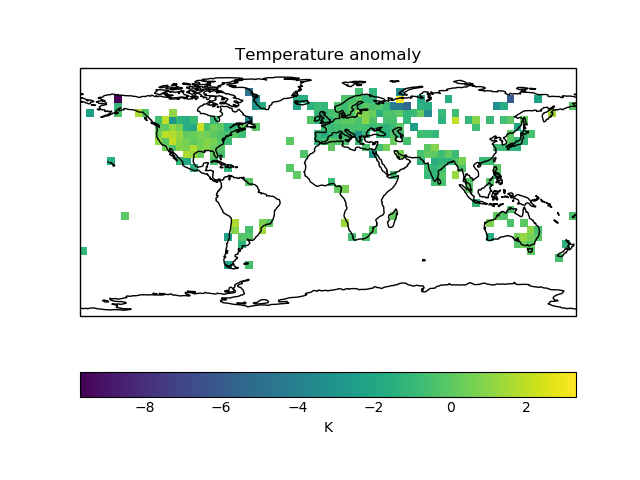

In [14]:
import iris.quickplot as qplt
import matplotlib.pyplot as plt

qplt.pcolormesh(temp_1880)
plt.gca().coastlines()

In [15]:
!ncdump -h $fname

netcdf CRUTEM.4.6.0.0.anomalies {
dimensions:
	latitude = 36 ;
	longitude = 72 ;
	time = UNLIMITED ; // (2016 currently)
	field_status_string_length = 1 ;
variables:
	float latitude(latitude) ;
		latitude:standard_name = "latitude" ;
		latitude:long_name = "latitude" ;
		latitude:point_spacing = "even" ;
		latitude:units = "degrees_north" ;
		latitude:axis = "Y" ;
	float longitude(longitude) ;
		longitude:standard_name = "longitude" ;
		longitude:long_name = "longitude" ;
		longitude:point_spacing = "even" ;
		longitude:units = "degrees_east" ;
		longitude:axis = "X" ;
	float time(time) ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:units = "days since 1850-1-1 00:00:00" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
	float temperature_anomaly(time, latitude, longitude) ;
		temperature_anomaly:long_name = "temperature_anomaly" ;
		temperature_anomaly:units = "K" ;
		temperature_anomaly:missing_value = -1.e+30f ;
		temperature_anomaly:_FillValue = -1.e+30f ;

In [17]:
# https://crudata.uea.ac.uk/cru/data/temperature/
abs_fname = '~/Downloads/absolute.nc'

abs_t = iris.load_cube(abs_fname)

/Users/pelson/miniconda/envs/cartopy_all/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/Users/pelson/miniconda/envs/cartopy_all/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):


In [23]:
r = abs_t[11]
r.convert_units('K')
temp_1880.data = temp_1880.data + r.data

/Users/pelson/miniconda/envs/cartopy_all/lib/python3.6/site-packages/iris/coords.py:975: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/Users/pelson/miniconda/envs/cartopy_all/lib/python3.6/site-packages/iris/coords.py:975: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


<IPython.core.display.Javascript object>


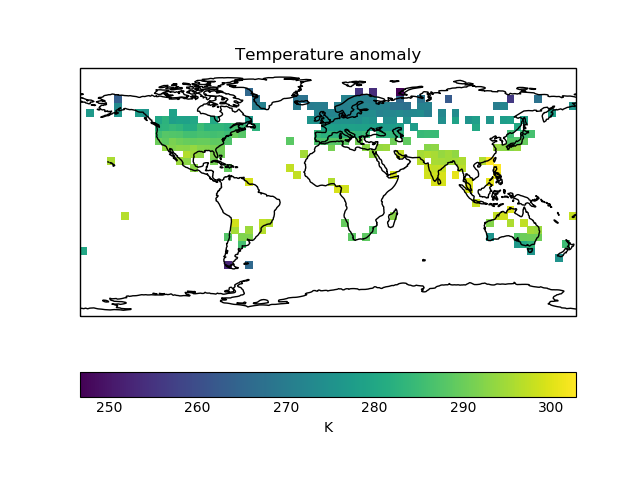

In [24]:
import iris.quickplot as qplt
import matplotlib.pyplot as plt

qplt.pcolormesh(temp_1880)
plt.gca().coastlines()

<IPython.core.display.Javascript object>


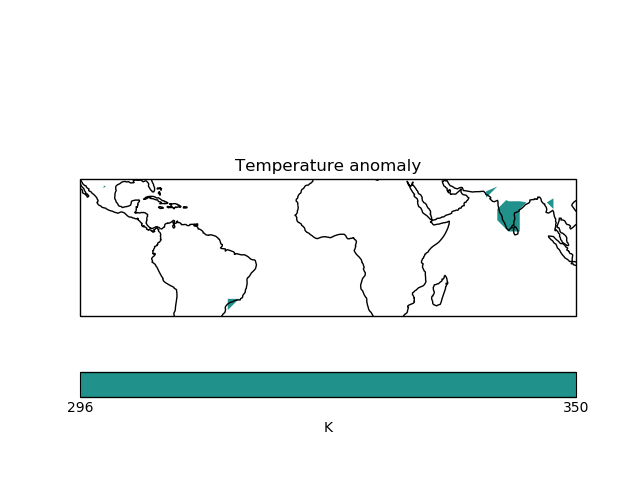

In [28]:
qplt.contourf(temp_1880, [296, 350])
plt.gca().coastlines()